# <font size= 1> <font color='FFFFFF'>**Máquinas de vectores de soporte**

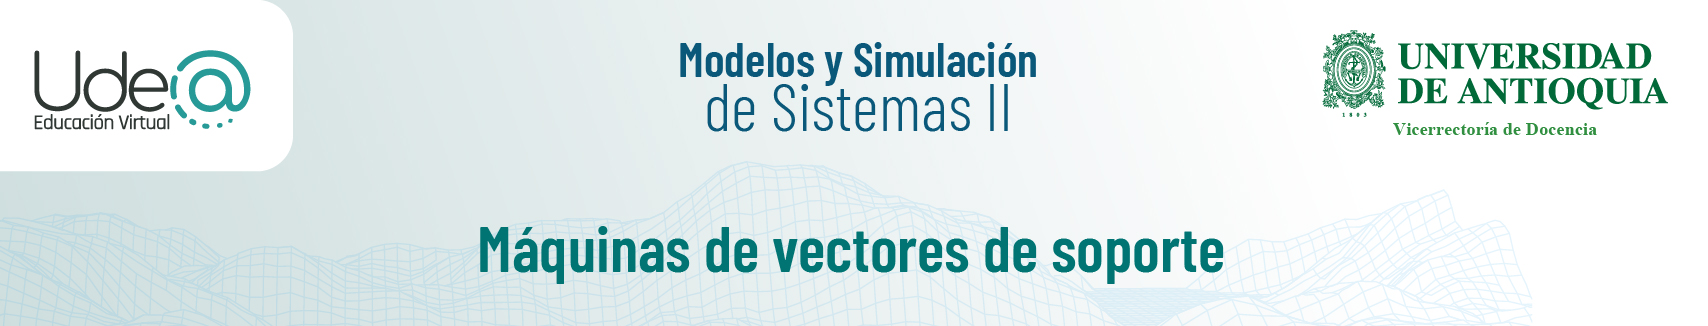

Las máquinas de soporte vectorial o máquinas de vectores de soporte (SVM, del inglés <b> Support Vector Machines) </b>) son un tipo de modelo de aprendizaje que permiten encontrar la mejor solución utilizando como criterio de ajuste la máximización del márgen, entendiendo márgen como la distancia más corta entre la frontera de decisión y cualquiera de las muestras [(ver documentación](https://scikit-learn.org/stable/modules/svm.html)).

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt

In [ ]:


# Create color maps for 3-class classification problem, as with iris

def plot_estimator(estimator, X, y):
    from matplotlib.colors import ListedColormap

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    try:
        X, y = X.values, y.values
    except AttributeError:
        pass

    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
    return plt

def PlotEjemploSVR(X,y,y_rbf,y_lin,y_poly):
	plt.scatter(X, y, c='k', label='data')
	plt.plot(X, y_rbf, c='g', label='RBF model')
	plt.plot(X, y_lin, c='r', label='Linear model')
	plt.plot(X, y_poly, c='b', label='Polynomial model')
	plt.xlabel('data')
	plt.ylabel('target')
	plt.title('Support Vector Regression')
	plt.legend()
	plt.show()

Recordemos cómo se mide la distancia de un punto a un plano:

In [ ]:
x1 = -1, 0
x2 = 1, 1
plt.scatter(*x1, s=300, marker='+')
plt.scatter(*x2, s=300, marker='+', color='r')
plt.plot([-.5,.5], [1.5,-.5], 'k-')
plt.plot([-1, 1], [-.5, 1.7], 'k--')
plt.annotate(r"$\bf{w}$", xy=(0.6, 1.5), fontsize=20)
plt.arrow(-1, 0, .1, -.2, fc="b", ec="b", head_width=0.07, head_length=0.1)
plt.arrow(1, 1, -.2, .37, fc="r", ec="r", head_width=0.07, head_length=0.1)

La formulación del modelo SVM asume que las clases son separables, al menos en un espacio de alta dimensión. Sin embargo, las distribuciones de las clases pueden estar traslapadas y, por consiguiente, es necesario modificar la SVM para que permita que algunas muestras queden mal clasificadas.

Lo que se hace entonces es permitir que las muestras se ubiquen en el lado incorrecto de la frontera, pero aplicando una penalidad proporcional a la distancia de esta ([ver documentación](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)).

Veamos algunos ejemplos prácticos utilizando la librería SciKit-Learn para python.

Creamos el conjunto artifical de datos:

In [ ]:
import numpy as np
from sklearn import svm
x1 = 3*np.random.rand(2,100)
x2 = 3*np.random.rand(2,100) + 2
plt.title(u'Espacio de características', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Característica 2')
plt.scatter(x1[0,:], x1[1,:])
plt.scatter(x2[0,:], x2[1,:],color='red')

Definimos el kernel y entrenamos la SVM:

In [ ]:
X = np.concatenate((x1.T,x2.T),axis=0)
y = np.concatenate((np.ones((100,1)),np.zeros((100,1))),axis=0)
y = np.ravel(y)
svc = svm.SVC(kernel='linear')
svc.fit(X, y)

Veamos la frontera de decisión y los vectores de soporte:

In [ ]:
plt = plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0],
           svc.support_vectors_[:, 1],
           s=120,
           facecolors='none',
           edgecolors='black',
           linewidths=2,
           zorder=10)

Veamos el efecto de $C$:

In [ ]:
svc = svm.SVC(kernel='rbf', C=1e6)
plt = plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Alto valor de C: Número bajo de vectores de soporte')

svc = svm.SVC(kernel='rbf', C=1e-2)
plt = plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Bajo valor de C: Número alto de vectores de soporte')

Ahora, veamos el efecto de la función kernel desde la librería SciKit-Learn, ya que la mayoría de librerías de este tipo trae varias funciones kernels que se pueden escoger, e incluso se puede crear una función kernel particular y pasarla como argumento:

In [ ]:
svc_lin = svm.SVC(kernel='linear')
plot_estimator(svc_lin, X, y)
plt.scatter(svc_lin.support_vectors_[:, 0], svc_lin.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel lineal')

svc_poly = svm.SVC(kernel='poly', degree=3)
plot_estimator(svc_poly, X, y)
plt.scatter(svc_poly.support_vectors_[:, 0], svc_poly.support_vectors_[:, 1],
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel polinomial de grado 3')

svc_poly = svm.SVC(kernel='poly', degree=7)
plot_estimator(svc_poly, X, y)
plt.scatter(svc_poly.support_vectors_[:, 0], svc_poly.support_vectors_[:, 1],
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel polinomial de grado 7')

svc_rbf = svm.SVC(kernel='rbf', gamma=1e2)
plot_estimator(svc_rbf, X, y)
plt.scatter(svc_rbf.support_vectors_[:, 0], svc_rbf.support_vectors_[:, 1],
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel Gaussiano o RBF')

Es necesario tener en cuenta que durante el proceso de entrenamiento tendremos que definir el valor del parámetro $C$ y el o los parámetros del kernel que seleccionemos.

# <font size= 1> <font color='FFFFFF'>Regresión por vectores de soporte

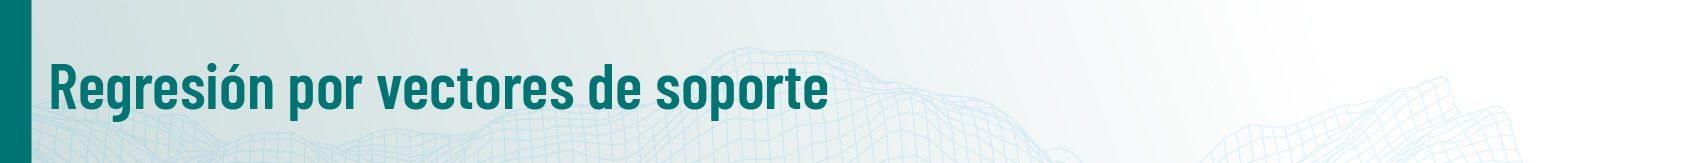

El modelo de SVM descrito hasta el momento puede ser extendido para resolver problemas de regresión. En este caso, en lugar de minimizar una función de error cuadrático medio regularizada, se reemplaza por una función de error $\epsilon$-insensitiva.

$$ \begin{align}
E_\epsilon(y({\bf{x}})-t) =
\begin{cases}
0  & \textrm{if} \;\; |y({\bf{x}}) - t| < \epsilon; \\
|y({\bf{x}}) - t| - \epsilon & \text{en otro caso} \\
\end{cases}.
\end{align} $$

El resultado del proceso de optimización permitirá establecer las muestras que caen en el límite del $\epsilon$-tubo o fuera de él, y las caen dentro. Se entiende que una muestra no puede estar al mismo tiempo por arriba y por debajo de la función objetivo, por lo que para cada muestra $a_n^{+}$, $a_n^{-}$ o ambos, deben ser cero.

La figura disponible en [Support Vector Regression with RBF kernel](https://basilio.dev/screenshots.html) para SVM muestra un ejemplo de frontera que puede ser obtenida usando una SVR con kernel RBF.

Veamos algunos ejemplos prácticos del uso de SVR:

In [ ]:
from sklearn.svm import SVR
###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
PlotEjemploSVR(X,y,y_rbf,y_lin,y_poly)

In [ ]:
###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.01)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)
###############################################################################
# look at the results
PlotEjemploSVR(X,y,y_rbf,y_lin,y_poly)

In [ ]:
###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e7, gamma=0.01)
svr_lin = SVR(kernel='linear', C=1e7)
svr_poly = SVR(kernel='poly', C=1, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
PlotEjemploSVR(X,y,y_rbf,y_lin,y_poly)

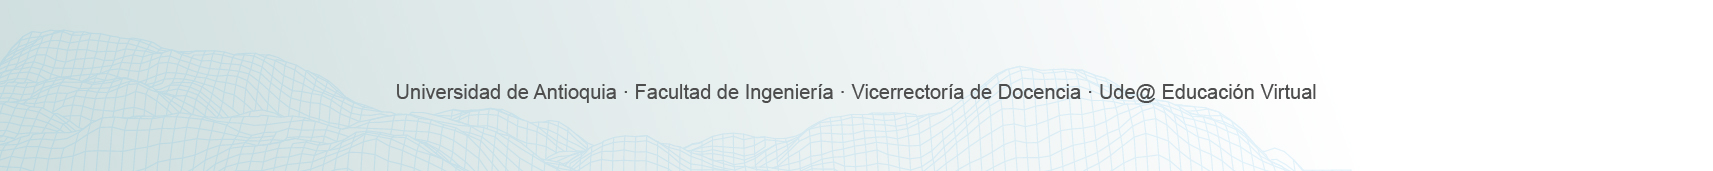